In [9]:
from data_retreiver_2 import retrieve_goes_glmf, parallel_interp
import xarray as xr
import cdsapi
import netCDF4 as nc
from goes2go import GOES
import requests
from datetime import datetime, timedelta
import os
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor, as_completed
from concurrent.futures import ProcessPoolExecutor, as_completed
import numpy as np
from numba import njit, prange
from scipy.interpolate import griddata
from scipy.spatial import cKDTree
import multiprocessing
import time


In [10]:
date = datetime(2020, 4, 29)

start_time = time.time()
retrieve_goes_glmf(date, 'glm_test.nc')
end_time = time.time()
duration = end_time - start_time  # duration in seconds
duration_minutes = duration / 60.0
print(duration_minutes)

Processing files for year 2020, day 120, hour 0Processing files for year 2020, day 120, hour 1Processing files for year 2020, day 120, hour 2Processing files for year 2020, day 120, hour 3Processing files for year 2020, day 120, hour 5Processing files for year 2020, day 120, hour 4





Processing files for year 2020, day 120, hour 6
Processing files for year 2020, day 120, hour 7
Processing files for year 2020, day 120, hour 8
Processing files for year 2020, day 120, hour 9
Processing files for year 2020, day 120, hour 10
Processing files for year 2020, day 120, hour 11
Processing files for year 2020, day 120, hour 12
Processing files for year 2020, day 120, hour 13
Processing files for year 2020, day 120, hour 14
Processing files for year 2020, day 120, hour 15
Processing files for year 2020, day 120, hour 16
Processing files for year 2020, day 120, hour 17
Processing files for year 2020, day 120, hour 18
Processing files for year 2020, day 120, hour 19
Processing files for year 2020

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:324: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:324: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to glm_test.nc
Faulty links have been saved to faulty_links.txt
0.5933769663174947


In [11]:
boundaries = [(25, 45), (-110, -70)]
target = xr.open_dataset('49532bf0b60c575c14ab777b16ea9b54.nc')

In [12]:
fed_test = xr.open_dataset('glm_test.nc')
fed_test

<xarray.Dataset> Size: 3GB
Dimensions:     (x: 5424, y: 5424, time: 24)
Coordinates:
  * x           (x) float64 43kB -0.1519 -0.1518 -0.1518 ... 0.1518 0.1518
  * y           (y) float64 43kB 0.1519 0.1518 0.1518 ... -0.1518 -0.1518
  * time        (time) datetime64[ns] 192B 2020-04-29T03:00:00 ... 2020-04-30
Data variables:
    FED_Window  (time, y, x) float32 3GB ...

In [13]:
output_file = parallel_interp("glm_test.nc", boundaries, target)


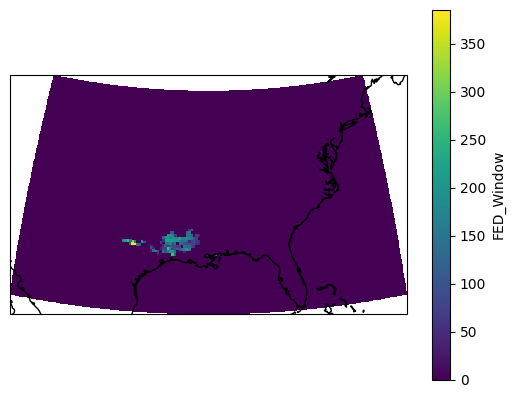

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
Flash_extent_density = xr.open_dataset('glm_test_interpolated.nc')
p = Flash_extent_density['FED_Window'].isel(time=9).plot(
    x='longitude', y='latitude', 
    subplot_kws={'projection' : ccrs.Orthographic(-90, 35)},
    transform = ccrs.PlateCarree()
)
p.axes.add_feature(cfeature.COASTLINE)
plt.show()